Loading training dataset...
Training dataset loaded successfully.
Loading testing dataset...
Testing dataset loaded successfully.
Splitting training data into features and target...
Splitting testing data into features and target...
Preprocessing text data using TF-IDF Vectorizer...
Defining Naive Bayes classifier...
Training Naive Bayes model...
Naive Bayes model trained successfully!
Evaluating the model on the test set...
Test Evaluation Metrics:
Confusion Matrix:
 [[55081   764]
 [ 3744 26998]]
Precision: 0.9724803688495065
Recall: 0.8782122178127643
Accuracy: 0.9479367572499336
F1 Score: 0.9229454396280596
Plotting the confusion matrix...


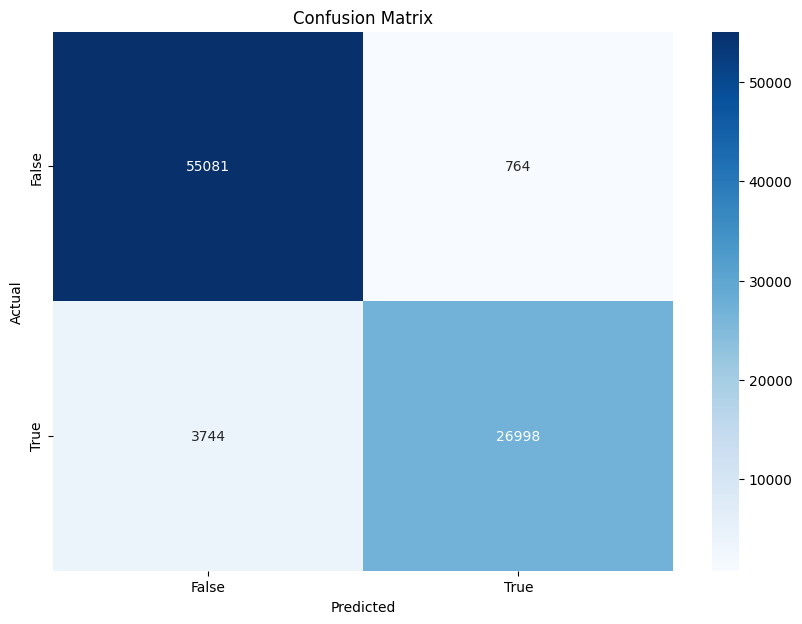

Saving the trained model and the TF-IDF Vectorizer...
Trained model and TF-IDF Vectorizer saved successfully!


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import joblib

# Load the training dataset
train_file_path = r'./final_train.csv'  # Adjust file path as needed
print("Loading training dataset...")
train_data = pd.read_csv(train_file_path)
print("Training dataset loaded successfully.")

# Load the testing dataset
test_file_path = r'./final_test.csv'  # Adjust file path as needed
print("Loading testing dataset...")
test_data = pd.read_csv(test_file_path)
print("Testing dataset loaded successfully.")

# Split the training data into features and target
print("Splitting training data into features and target...")
X_train = train_data['text']  # 'text' should be the name of the column containing text data
y_train = train_data['label']  # 'label' should be the name of the column containing target labels

# Split the testing data into features and target
print("Splitting testing data into features and target...")
X_test = test_data['text']  # 'text' should be the name of the column containing text data
y_test = test_data['label']  # 'label' should be the name of the column containing target labels

# Preprocess text data using TF-IDF Vectorizer
print("Preprocessing text data using TF-IDF Vectorizer...")
tfidf_vectorizer = TfidfVectorizer()  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define the Naive Bayes classifier
print("Defining Naive Bayes classifier...")
nb = MultinomialNB()

# Train the Naive Bayes model
print("Training Naive Bayes model...")
nb.fit(X_train_tfidf, y_train)
print("Naive Bayes model trained successfully!")

# Evaluate the model on the test set
print("Evaluating the model on the test set...")
y_test_pred = nb.predict(X_test_tfidf)
conf_matrix = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print test evaluation metrics
print("Test Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot the confusion matrix
print("Plotting the confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and the TF-IDF Vectorizer
print("Saving the trained model and the TF-IDF Vectorizer...")
joblib.dump(nb, '1-naive_bayes_text_classification_model.h5')
joblib.dump(tfidf_vectorizer, '1-tfidf_vectorizer.h5')
print("Trained model and TF-IDF Vectorizer saved successfully!")
